<a href="https://colab.research.google.com/github/saidileep-knv/Customer-Churn-Analysis/blob/master/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import os
os.chdir("./gdrive/My Drive/Colab Notebooks")

In [0]:
!pip install newspaper3k
!pip install newsapi-python
import AdvancedAnalytics

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv("Telco_Customer_Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
print("No. of duplicated entries in the dataset = "+str(len(df[df.duplicated(keep=False)])))

No. of duplicated entries in the dataset = 0


In [0]:
##Converting TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors ='coerce')

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [0]:
##Imputing missing values in the TotalCharges with mean
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace = True)

In [11]:
for col in df.columns:
  #if df[col].isnull().sum()>0:
    print('number of missing values in {0} : {1}'.format(col, df[col].isnull().sum()))
  #else:
    #print("There is no missing data")

number of missing values in customerID : 0
number of missing values in gender : 0
number of missing values in SeniorCitizen : 0
number of missing values in Partner : 0
number of missing values in Dependents : 0
number of missing values in tenure : 0
number of missing values in PhoneService : 0
number of missing values in MultipleLines : 0
number of missing values in InternetService : 0
number of missing values in OnlineSecurity : 0
number of missing values in OnlineBackup : 0
number of missing values in DeviceProtection : 0
number of missing values in TechSupport : 0
number of missing values in StreamingTV : 0
number of missing values in StreamingMovies : 0
number of missing values in Contract : 0
number of missing values in PaperlessBilling : 0
number of missing values in PaymentMethod : 0
number of missing values in MonthlyCharges : 0
number of missing values in TotalCharges : 0
number of missing values in Churn : 0


In [0]:
df = df.drop('customerID', axis = 1)

In [13]:
df.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [0]:
df.columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 
              'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
              'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
              'MonthlyCharges', 'TotalCharges', 'Churn']

In [0]:
##Converting SeniorCitizen to object
df['SeniorCitizen'] = pd.Categorical(df["SeniorCitizen"])
df['SeniorCitizen']=df.SeniorCitizen.apply(lambda x:"Yes" if x==1 else "No")

##Exploratory Data Analysis

In [16]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,20
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,1.0 MiB
Average record size in memory,153.0 B
Numeric,3
Categorical,17
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [17]:
for col in df.columns:
  print("No.of Unique values in " + str(col) + " : " + str(df[col].nunique()))
  print("Unique Values of " + str(col) + " : "+ str(df[col].unique()))
  #print("Counts of " + str(col) + " :" + str(df[col].value_counts()))
  print("\n")

No.of Unique values in Gender : 2
Unique Values of Gender : ['Female' 'Male']


No.of Unique values in SeniorCitizen : 2
Unique Values of SeniorCitizen : [No, Yes]
Categories (2, object): [No, Yes]


No.of Unique values in Partner : 2
Unique Values of Partner : ['Yes' 'No']


No.of Unique values in Dependents : 2
Unique Values of Dependents : ['No' 'Yes']


No.of Unique values in Tenure : 73
Unique Values of Tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


No.of Unique values in PhoneService : 2
Unique Values of PhoneService : ['No' 'Yes']


No.of Unique values in MultipleLines : 3
Unique Values of MultipleLines : ['No phone service' 'No' 'Yes']


No.of Unique values in InternetService : 3
Unique Values of InternetService : ['DSL' 'Fiber optic' 'No']


No.of Unique values in OnlineSecurity : 3
Unique Va

In [18]:
df.Churn.value_counts()
##This isn't a traditional Rare Event Problem as the event of interest is not less than 10% of the data.

No     5174
Yes    1869
Name: Churn, dtype: int64

In [0]:
categorical_feature_list = df.columns.drop(['Tenure','MonthlyCharges','TotalCharges', 'Churn'])
numeric_feature_list = ['Tenure','MonthlyCharges', 'TotalCharges']

In [20]:
##Tables that indicate levels of Churn within each feature

for col in categorical_feature_list:
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
  print("Churn vs", col)
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
  print(df.groupby([col])['Churn'].value_counts())
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
  print("\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~
Churn vs Gender
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~
Churn vs SeniorCitizen
~~~~~~~~~~~~~~~~~~~~~~~~~~~
SeniorCitizen  Churn
No             No       4508
               Yes      1393
Yes            No        666
               Yes       476
Name: Churn, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~
Churn vs Partner
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~
Churn vs Dependents
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~

# Model Building


In [0]:
##Read the formatted data for building models
data = pd.read_excel("Telco_CustomerChurn_Formatted.xlsx")

In [22]:
data.head(3)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,0,1,0,1,0,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,0,1,0,0


In [0]:
data.set_index("customerID", inplace=True)

In [0]:
target = data['Churn']
feature_input = data.drop(['Churn'], axis = 1)
target = np.ravel(target)




Using ExtraTreesClassifier to determine the important features

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from collections import OrderedDict
import pprint
feature_importance_indicator = ExtraTreesClassifier(n_estimators = 100, random_state=999)

feature_importance_indicator.fit(feature_input,target)
importance_dict = dict(zip(feature_input.columns, feature_importance_indicator.feature_importances_))
importance_dict_sorted = OrderedDict(sorted(importance_dict.items(), key = lambda feature_input:feature_input[1], reverse = 1))
pprint.pprint(importance_dict_sorted)

OrderedDict([('TotalCharges', 0.1485868045080682),
             ('Tenure', 0.14071363986324356),
             ('MonthlyCharges', 0.13050817140776663),
             ('Month-to-month', 0.07939921554649956),
             ('Gender', 0.03721975998700114),
             ('Fiber optic', 0.03677877981803159),
             ('Electronic check', 0.03611044693780139),
             ('Partner', 0.031329259220466414),
             ('PaperlessBilling', 0.029909923516472953),
             ('OnlineBackup', 0.027157017694836794),
             ('DeviceProtection', 0.026066269948376727),
             ('OnlineSecurity', 0.02593532210990067),
             ('SeniorCitizen', 0.02541935134016725),
             ('MultipleLines', 0.0248391766927075),
             ('Dependents', 0.024427209923005094),
             ('TechSupport', 0.024404853097585173),
             ('StreamingMovies', 0.022929005164654185),
             ('StreamingTV', 0.022407968979298462),
             ('Two year', 0.020317947145896745),
        

Total Charges, Tenure and MOnthly Charges tend to be the important features among all.

In [0]:
##Split the dataset to train and test sets to assess the performance of the model.
train_input, test_input, train_target, test_target = train_test_split(feature_input, target, test_size=0.2, random_state=9999)

In [0]:
##Normalize/Standardize the features before applying Machine Learning Models
sc = StandardScaler()
train_input = sc.fit_transform(train_input)
test_input = sc.transform(test_input)

##Logistic Regression

In [32]:
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
#Set up the hyperparameter grid
penalty = ['l1', 'l2']
c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_distributions = {"penalty": penalty, "C": c_space}

#Create the logistic regression classifier
logreg  =LogisticRegression()
#Use RandomizedSearchCV to find the best parameters 
logreg_rscv = RandomizedSearchCV(logreg, param_distributions, cv=5)
#Fit the classifier to the training data
logreg_rscv.fit(train_input, train_target)
#Print the best parameters and estimator
print("Tuned Logistic Regression Parameters: {}".format(logreg_rscv.best_params_))
print("Tuned Logistic Regression Estimator: {}".format(logreg_rscv.best_estimator_))

Tuned Logistic Regression Parameters: {'penalty': 'l2', 'C': 1000}
Tuned Logistic Regression Estimator: LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [33]:
clf = LogisticRegression(C=1000, penalty='l2')
clf.fit(train_input, train_target)
print(clf.intercept_)
print("\n")
print(clf.coef_)

[-1.6783888]


[[ 0.0269239   0.07635818 -0.00429911 -0.08083143 -1.33149807  0.04827814
   0.22069809 -0.05642343  0.00199871  0.05287194 -0.07080061  0.27768065
   0.287903    0.16660191 -1.14881721  0.63621246  0.74956721 -0.07638623
  -0.82094396  0.30277769 -0.34910774 -0.003931    0.11712937 -0.03142256
  -0.02906691 -0.07306117]]


In [35]:
pred_clf = clf.predict(test_input)
print("Accuracy of the logistic regression model is {0}".format(clf.score(test_input, test_target)))

Accuracy of the logistic regression model is 0.8275372604684174


In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   #print("Normalized confusion matrix")
    else:
        1   #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[946 109]
 [134 220]]


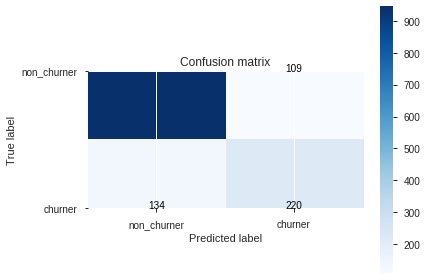

----------- Classification Report ------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1055
           1       0.67      0.62      0.64       354

    accuracy                           0.83      1409
   macro avg       0.77      0.76      0.77      1409
weighted avg       0.82      0.83      0.83      1409



<Figure size 432x288 with 0 Axes>

In [46]:
from sklearn.metrics import classification_report
cm = confusion_matrix(test_target, pred_clf)
class_names = ['non_churner', 'churner']
print(cm)
plt.figure()
plot_confusion_matrix(cm, class_names)
plt.show()
plt.show()
plt.tight_layout()
print('----------- Classification Report ------------')
print(classification_report(test_target, pred_clf))

In [47]:
from AdvancedAnalytics import logreg
logreg.display_binary_metrics(clf, test_input, test_target)


Model Metrics
Observations...............      1409
Coefficients...............        27
DF Error...................      1382
Mean Absolute Error........    0.2582
Avg Squared Error..........    0.1222
Accuracy...................    0.8275
Precision..................    0.6687
Recall (Sensitivity).......    0.6215
F1-Score...................    0.6442
MISC (Misclassification)...     17.2%
     class 0...............     10.3%
     class 1...............     37.9%


     Confusion
       Matrix     Class 0   Class 1  
Class 0.....       946       109
Class 1.....       134       220


Recall rate of 62% is not good enough for a model. 

It is only able to recognize the churned customers 62% of the time.

##Logistic Regression Model Optimization

Recall score of the optimized logistic regression model is:  0.8220338983050848
Accuracy of the optimized logistic regression model is 0.7735982966643009
[[799 256]
 [ 63 291]]


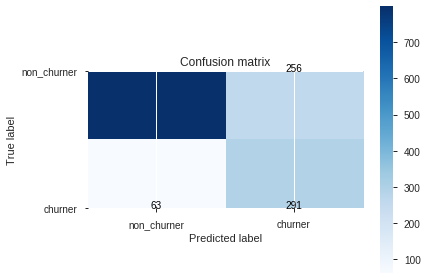

----------- Classification Report ------------
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1055
           1       0.53      0.82      0.65       354

    accuracy                           0.77      1409
   macro avg       0.73      0.79      0.74      1409
weighted avg       0.83      0.77      0.79      1409



<Figure size 432x288 with 0 Axes>

In [51]:
from sklearn.metrics import recall_score
##Initializing class weights
class_weights = {1:0.70, 0:0.30}
clf_opt = LogisticRegression(class_weight=class_weights, C=1000)
clf_opt.fit(train_input, train_target)
pred_opt = clf_opt.predict(test_input)
print("Recall score of the optimized logistic regression model is: ",recall_score(test_target, pred_opt))
print("Accuracy of the optimized logistic regression model is {0}".format(clf_opt.score(test_input, test_target)))

cm = confusion_matrix(test_target, pred_opt)
class_names = ['non_churner', 'churner']
print(cm)
plt.figure()
plot_confusion_matrix(cm, class_names)
plt.show()
plt.show()
plt.tight_layout()
print('----------- Classification Report ------------')
print(classification_report(test_target, pred_opt))

Recall rate of 82% is reasonable as the model is able to recognize the churners 82% of the time.

In [52]:
from AdvancedAnalytics import logreg
logreg.display_binary_metrics(clf_opt, test_input, test_target)


Model Metrics
Observations...............      1409
Coefficients...............        27
DF Error...................      1382
Mean Absolute Error........    0.2998
Avg Squared Error..........    0.1493
Accuracy...................    0.7736
Precision..................    0.5320
Recall (Sensitivity).......    0.8220
F1-Score...................    0.6459
MISC (Misclassification)...     22.6%
     class 0...............     24.3%
     class 1...............     17.8%


     Confusion
       Matrix     Class 0   Class 1  
Class 0.....       799       256
Class 1.....        63       291


Recall score of the optimized logistic regression model is:  0.8926553672316384
Accuracy of the optimized logistic regression model is 0.7125621007806955
[[688 367]
 [ 38 316]]


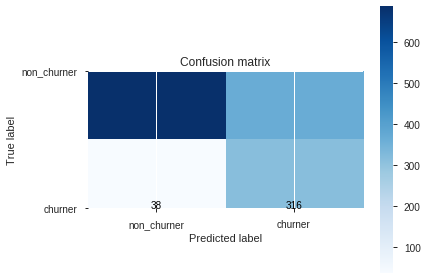

----------- Classification Report ------------
              precision    recall  f1-score   support

           0       0.95      0.65      0.77      1055
           1       0.46      0.89      0.61       354

    accuracy                           0.71      1409
   macro avg       0.71      0.77      0.69      1409
weighted avg       0.83      0.71      0.73      1409



<Figure size 432x288 with 0 Axes>

In [54]:
##Further optimizing to increase the recall rate.
class_weights_1 = {1:0.80, 0:0.20}
clf_opt_1 = LogisticRegression(class_weight=class_weights_1, C=best_c)
clf_opt_1.fit(train_input, train_target)
pred_opt_1 = clf_opt_1.predict(test_input)
print("Recall score of the optimized logistic regression model is: ",recall_score(test_target, pred_opt_1))
print("Accuracy of the optimized logistic regression model is {0}".format(clf_opt_1.score(test_input, test_target)))
##The model is now able to recognize the Churners 90.0% of the time.
cm = confusion_matrix(test_target, pred_opt_1)
class_names = ['non_churner', 'churner']
print(cm)
plt.figure()
plot_confusion_matrix(cm, class_names)
plt.show()
plt.show()
plt.tight_layout()
print('----------- Classification Report ------------')
print(classification_report(test_target, pred_opt_1))

Recall rate is close to 90% which indicates a good chance of segmenting the churners when the model is run.

In [55]:
from AdvancedAnalytics import logreg
logreg.display_binary_metrics(clf_opt_1, test_input, test_target)


Model Metrics
Observations...............      1409
Coefficients...............        27
DF Error...................      1382
Mean Absolute Error........    0.3397
Avg Squared Error..........    0.1879
Accuracy...................    0.7126
Precision..................    0.4627
Recall (Sensitivity).......    0.8927
F1-Score...................    0.6095
MISC (Misclassification)...     28.7%
     class 0...............     34.8%
     class 1...............     10.7%


     Confusion
       Matrix     Class 0   Class 1  
Class 0.....       688       367
Class 1.....        38       316


##Decision Tree Classifier

In [56]:
from AdvancedAnalytics import DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

depth_list = [2,3,4,5,10,15,20,25]
score_list = ['accuracy','recall','precision','f1']
for d in depth_list:
  print("\nMaximum Tree Depth: ", d)
  dtc = DecisionTreeClassifier(max_depth=d, min_samples_leaf=5, min_samples_split=5)
  dtc=dtc.fit(train_input, train_target)
  scores = cross_validate(dtc, train_input, train_target, scoring=score_list, cv=10)
                          
  print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
  for s in score_list:
    var = "test_"+s
    mean = scores[var].mean()
    std = scores[var].std()
    print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))


Maximum Tree Depth:  2
Metric.......  Mean    Std. Dev.
accuracy..... 0.7581    0.0208
recall....... 0.6106    0.0405
precision.... 0.5471    0.0359
f1........... 0.5759    0.0278

Maximum Tree Depth:  3
Metric.......  Mean    Std. Dev.
accuracy..... 0.7781    0.0159
recall....... 0.3550    0.0582
precision.... 0.6617    0.0445
f1........... 0.4603    0.0577

Maximum Tree Depth:  4
Metric.......  Mean    Std. Dev.
accuracy..... 0.7797    0.0186
recall....... 0.5016    0.0595
precision.... 0.6097    0.0430
f1........... 0.5492    0.0484

Maximum Tree Depth:  5
Metric.......  Mean    Std. Dev.
accuracy..... 0.7875    0.0187
recall....... 0.5855    0.0533
precision.... 0.6095    0.0363
f1........... 0.5964    0.0403

Maximum Tree Depth:  10
Metric.......  Mean    Std. Dev.
accuracy..... 0.7590    0.0243
recall....... 0.5234    0.0540
precision.... 0.5554    0.0477
f1........... 0.5383    0.0480

Maximum Tree Depth:  15
Metric.......  Mean    Std. Dev.
accuracy..... 0.7465    0.0230
recal

In [57]:
##Using depth of 5 to fit the model with best parameter
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)
dtc = dtc.fit(train_input, train_target)

DecisionTree.display_importance(dtc, feature_input.columns)
DecisionTree.display_binary_split_metrics(dtc, train_input, train_target, test_input, test_target)


FEATURE...................... IMPORTANCE
Month-to-month...............   0.5097
Tenure.......................   0.1718
Fiber optic..................   0.1483
MonthlyCharges...............   0.0409
TotalCharges.................   0.0360
No...........................   0.0258
Electronic check.............   0.0195
TechSupport..................   0.0116
One year.....................   0.0111
StreamingMovies..............   0.0098
PhoneService.................   0.0089
Two year.....................   0.0060
SeniorCitizen................   0.0005
Gender.......................   0.0000
Partner......................   0.0000
Dependents...................   0.0000
MultipleLines................   0.0000
OnlineSecurity...............   0.0000
OnlineBackup.................   0.0000
DeviceProtection.............   0.0000
StreamingTV..................   0.0000
PaperlessBilling.............   0.0000
DSL..........................   0.0000
Mailed check.................   0.0000
Bank transfer (automat

Recall score of the decision tree classsifer is 0.61 which shows no improvement over logistic regression model.

##Random Forest Classifier

In [58]:
# Random Forest model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

forest = RandomForestClassifier(n_estimators=10000, min_samples_split=5,
                                random_state=999, min_samples_leaf=5,
                                n_jobs=-1)

forest.fit(train_input, train_target)
##print(forest.score(X_test, y_test))


#K-fold cross validation code 
kfold = KFold(n_splits = 5, random_state=999)

scores = []
for train_index, test_index in kfold.split(train_input):
    X_train_kf, X_test_kf = train_input[train_index], train_input[test_index]
    y_train_kf, y_test_kf = train_target[train_index], train_target[test_index]
    forest.fit(X_train_kf, y_train_kf)
    score = forest.score(X_test_kf, y_test_kf)
    scores.append(score)
    print('Acc: %.3f' % (score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Acc: 0.788
Acc: 0.805
Acc: 0.791
Acc: 0.786
Acc: 0.813

CV accuracy: 0.797 +/- 0.010


In [59]:
print("The accuracy of the Random Forest Model is: {:>7.4f}".format(forest.score(test_input, test_target)))
pred_rf = forest.predict(test_input)
print("The sentitivity of the model is: {:>7.4f}".format(recall_score(test_target, pred_rf)))

The accuracy of the Random Forest Model is:  0.8261
The sentitivity of the model is:  0.5819


Even though, Random Forest is able to predict as accurately as the optimized Logistic Regression, Random forest model has very low sensitivity which shows no superiority in cosideration of this model over Logistic Regression.

In [64]:
# Evaluate feature importances
feat_labels = feature_input.columns.values.tolist()
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(feature_input.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Tenure                         0.162740
 2) TotalCharges                   0.148025
 3) MonthlyCharges                 0.134129
 4) Month-to-month                 0.115560
 5) Fiber optic                    0.068969
 6) Electronic check               0.047186
 7) Two year                       0.046160
 8) No                             0.026218
 9) PaperlessBilling               0.024110
10) OnlineSecurity                 0.019443
11) Gender                         0.017283
12) TechSupport                    0.017215
13) DSL                            0.017002
14) One year                       0.016493
15) StreamingMovies                0.016252
16) Partner                        0.014917
17) OnlineBackup                   0.014726
18) SeniorCitizen                  0.014583
19) MultipleLines                  0.013758
20) StreamingTV                    0.013490
21) Dependents                     0.011949
22) DeviceProtection               0.011202
23) Credit card (automatic)     

##Feed Forward Neural Network

In [66]:
from AdvancedAnalytics import NeuralNetwork
from sklearn.neural_network import MLPClassifier
# Cross-Validation
best_network = 0
best_alpha = 0
best_F1 = 0
network_list = [(3), (11), (5,4), (6,5), (7,6), (8,7)]
alpha_list = [0, 0.1, 0.15, 0.2, 0.25, 0.3]
score_list = ['accuracy', 'recall', 'precision', 'f1']
for nn in network_list:
  print("\nNetwork: ", nn)
  for a in alpha_list:
    print("\nAlpha: ", a)
    fnn = MLPClassifier(hidden_layer_sizes=nn, activation='tanh', 
                    alpha=a, tol=1e-32, solver='lbfgs',
                    max_iter=5000, random_state=12345)
    scores = cross_validate(fnn, feature_input, target, scoring=score_list, 
                    return_train_score=False, cv=10)
    print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
    for s in score_list:
        var = "test_"+s
        mean = scores[var].mean()
        std = scores[var].std()
        print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))
        if s == "f1" and best_F1 < mean:
            best_F1 = mean
            best_network = nn
            best_alpha = a




Network:  3

Alpha:  0
Metric.......  Mean    Std. Dev.
accuracy..... 0.7900    0.0140
recall....... 0.5036    0.1565
precision.... 0.6465    0.0490
f1........... 0.5427    0.1167

Alpha:  0.1
Metric.......  Mean    Std. Dev.
accuracy..... 0.7920    0.0133
recall....... 0.4650    0.1636
precision.... 0.6764    0.0697
f1........... 0.5229    0.1210

Alpha:  0.15
Metric.......  Mean    Std. Dev.
accuracy..... 0.7872    0.0209
recall....... 0.3982    0.1979
precision.... 0.6232    0.2180
f1........... 0.4619    0.1888

Alpha:  0.2
Metric.......  Mean    Std. Dev.
accuracy..... 0.7887    0.0111
recall....... 0.4714    0.1354
precision.... 0.6581    0.0758
f1........... 0.5292    0.0950

Alpha:  0.25
Metric.......  Mean    Std. Dev.
accuracy..... 0.7928    0.0127
recall....... 0.4671    0.1607
precision.... 0.6841    0.0812
f1........... 0.5259    0.1152

Alpha:  0.3
Metric.......  Mean    Std. Dev.
accuracy..... 0.7911    0.0145
recall....... 0.4554    0.1701
precision.... 0.6833    0.078

In [67]:
print("The best Network with F1 = ", best_F1)
print("Perceptrons: ", best_network)
print("Alpha: ", best_alpha)

The best Network with F1 =  0.599972739927894
Perceptrons:  (7, 6)
Alpha:  0.25


In [68]:
fnn = MLPClassifier(hidden_layer_sizes=best_network, activation='tanh',
                    alpha=best_alpha, tol=1e-32, solver='lbfgs',
                    max_iter=5000, random_state=999)
fnn_model = fnn.fit(train_input, train_target)
fnn_predict = fnn.predict(test_input)
print(recall_score(test_target, fnn_predict))
NeuralNetwork.display_binary_split_metrics(fnn, train_input, train_target, test_input, test_target)

0.5480225988700564


Model Metrics..........       Training     Validation
Observations...........           5634           1409
Features...............             26             26
Number of Layers.......              2              2
Number of Outputs......              1              1
Number of Neurons......             13             13
Number of Weights......            244            244
Number of Iterations...           1035           1035
Activation Function....       logistic       logistic
Mean Absolute Error....         0.2276         0.2585
Avg Squared Error......         0.1130         0.1492
Accuracy...............         0.8381         0.7828
Precision..............         0.7314         0.5706
Recall (Sensitivity)...         0.6290         0.5480
F1-score...............         0.6764         0.5591
MISC (Misclassification)...      16.2%          21.7%
     class 0...............       8.5%          13.8%
     class 1...............      37.1%          45.2%


Train

Neural networks neither showed improvement in terms of accuracy  nor recall score over Random Forest and Logistic Regression.

---

The best model to choose from the above analysis to predict churn is the optimized Logistic Regression model with class weights {1:0.80, 0:0.20}.